In [197]:
from brian2 import *
from DynapSE import DynapSE

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Display plots inside Jupyter cell
%matplotlib inline 
# Set the dots-per-inch (resolution) of the images
mpl.rcParams['figure.dpi'] = 90

from equations.dynapse_eq import *
from parameters.dynapse_param import *

# C++ code generation for faster spiking network simulation
set_device('cpp_standalone')
# Ignore Brian2 base waclear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\Anja\.cython\brian_extensionsrnings
BrianLogger.suppress_name('base')
# The clock of Brian2 simulation for numerically solve ODEs
defaultclock.dt = 20 * us

In [ ]:
import samna
import samna.dynapse1 as dyn1
import time

import sys
# change the path to '/home/class_NI2021/ctxctl_contrib' on zemo
sys.path.insert(1, '/home/class_NI2021/ctxctl_contrib')
from Dynapse1Constants import *
import Dynapse1Utils as ut
import NetworkGenerator as n
from NetworkGenerator import Neuron
import numpy as np

In [ ]:
# open DYNAP-SE1 board to get Dynapse1Model
device_name = "my_dynapse1"
# change the port numbers to not have conflicts with other groups
store = ut.open_dynapse1(device_name, gui=False, sender_port=12345, receiver_port=12346)
model = getattr(store, device_name)

Create a network


In [ ]:
# initialize a networkgenerator
net_gen = n.NetworkGenerator()


In [198]:
# to start a new build to run multiple full simulations
device.reinit()
device.activate()
# need to reset the defaultclock after activate
defaultclock.dt = 20 * us

# create a network
network = Network()
chip = DynapSE(network)

# define the network parameters
num = 21

In [199]:
def gaussian(x, mu, sigma = 1.0):
    '''
    Author: Jingyue
    Calculate the Gaussian value given a position x, the Guassian center mu and sigma.
    '''
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))


In [200]:
# create population
exc  = chip.get_neurons(int(num), 'Core_1')

21 neurons are allocated from Core_1.


In [201]:
spikegen = PoissonGroup(1, 100*Hz)

In [202]:
#0 to 13 excitatory
#14 to 20 inhibitory
output_j = np.zeros((21*7,))

for i in range(21):       
    indxs = np.arange(21)
    np.random.shuffle(indxs)
    indxs_delete=np.delete(indxs,np.where(indxs==i))
    output_j[(i*7):(i*7+7)] = indxs_delete[0:7]

output_j = output_j.astype(int)
output_j = np.ndarray.tolist(output_j)

output_i = np.repeat(arange(21),7)
output_i = np.ndarray.tolist(output_i)

idx_ee_i = []
idx_ee_j = []

idx_ei_i = []
idx_ei_j = []

idx_ie_i = []
idx_ie_j = []


for a,i in enumerate(output_i):
    #print(a)
    j = output_j[a] 
    if i <= 13: 
        if j <= 13: 
            #print(i,j)
            idx_ee_i.append(i)
            idx_ee_j.append(j)
        if j > 13:
            idx_ei_i.append(i)
            idx_ei_j.append(j)
    if i > 13:
        idx_ie_i.append(i)
        idx_ie_j.append(j)
    

0 [ 9 15 18 19  1  7  4 12 20 11  3  5  6  2 14 17  8 16 10 13]
1 [ 2 16 11  0 19 18 14 15  4 20 13  6 12 10  8  5  3  9  7 17]
2 [ 4  8 13  1 10  7 20 11  9 16 17  0  3  6 19  5 12 14 18 15]
3 [ 0  1  9 11 15 17  6  7 16 12  8 19 14  4 10 13 18  2 20  5]
4 [ 1 16 20  5 12 11 19 10 17  9 14 15 18 13  0  8  3  2  6  7]
5 [20 18 13 19 12  1  9 17 14  2  4 10  6  0  3 11 16  7 15  8]
6 [11  7  3 16 10  2  9 14  4  8 20  5 18 19 13  0 12  1 15 17]
7 [13  3  9 14 17  5  2  1 19 12  4 18  6 15  0 16  8 11 20 10]
8 [10  0 14 20 16  2  9 18 17  3 13 12 11  7  4  6 15  1 19  5]
9 [ 7 20 12  5 14  1 10 16 11 15  4  2 17 18  6 13  0  3 19  8]
10 [ 4 18 13 11  2 20  9 17 19  8 15  3  0 14 12  1  7  6  5 16]
11 [ 7 14  9 15  5 18 20  8  3  6 19  2 16 13 12  4  1 10  0 17]
12 [ 8  2 18  0  9 15 13 19 11 20  6  4  7 14  5 16 17 10  3  1]
13 [ 6 19  8 16  3 15 10  2  9  4 14 20 17 11  0 12 18  7  1  5]
14 [ 8  1  5 18  3 12 16  7  0 10 11  9 13 15  4  2  6 20 19 17]
15 [ 3 14  6  9  8  4  5 17 20  2 1

In [203]:
idx_input = arange(14)
idx_input = np.ndarray.tolist(idx_input)
print(idx_input)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [204]:
syn_ee = chip.add_connection(exc,exc,synapse_type = "NMDA") 
syn_ei = chip.add_connection(exc,exc,synapse_type = "AMPA") 
syn_ie = chip.add_connection(exc,exc,synapse_type = "GABA_B") 
syn_input = chip.add_connection(spikegen,exc,synapse_type = "NMDA")

syn_ee.connect(i=idx_ee_i, j=idx_ee_j)
syn_ei.connect(i=idx_ei_i, j=idx_ei_j)
syn_ie.connect(i=idx_ie_i, j=idx_ie_j)
syn_input.connect(i=0,j=idx_input)

syn_input.weight = 0.1
syn_ee.weight = 0.1
syn_ei.weight = 0.1
syn_ie.weight = 0.1
    

In [205]:
spikemon = SpikeMonitor(exc, record=True)
network.add([spikegen, exc, spikemon])

# Simulation
duration = 0.5 * second
network.run(duration)

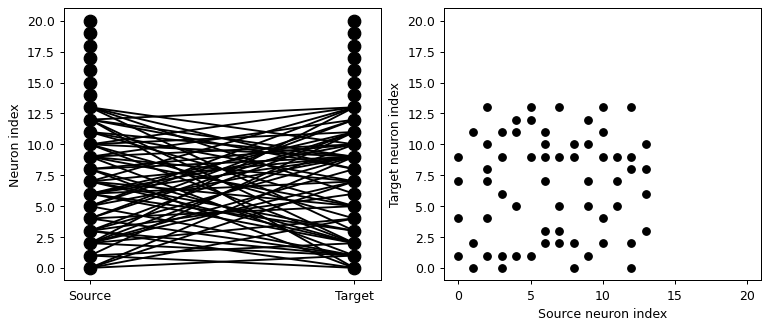

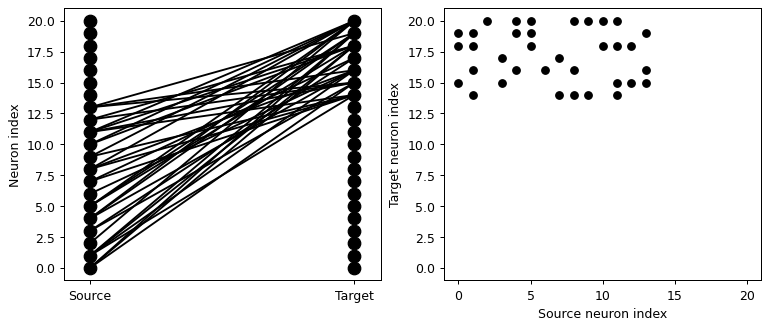

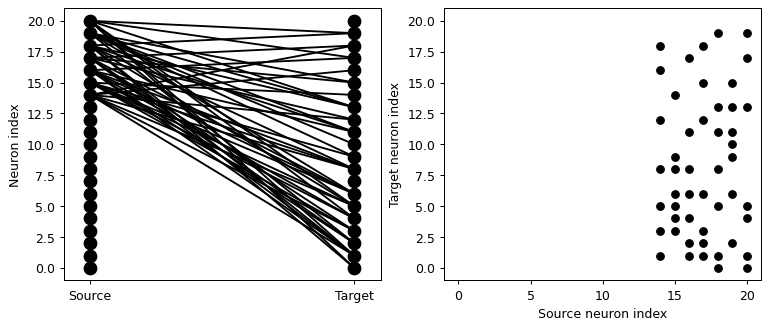

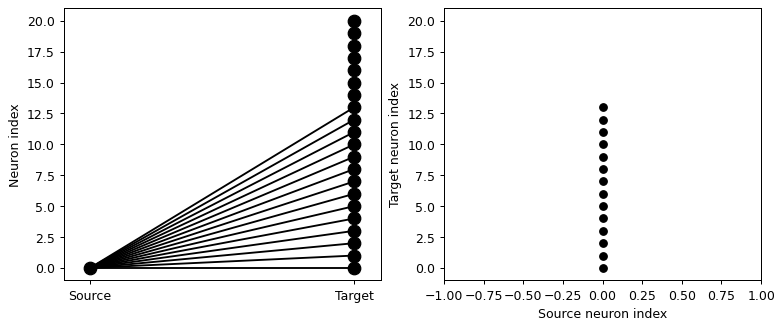

In [206]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

visualise_connectivity(syn_ee)
visualise_connectivity(syn_ei)
visualise_connectivity(syn_ie)
visualise_connectivity(syn_input)

In [207]:
def interspike(spike_timing, n_bins):
    
    spike_t_shifted = spike_timing[1:]
    spike_t_nolast = spike_timing[0:-1]
    
    isi = spike_t_shifted - spike_t_nolast
    
    density, isi_values = np.histogram(isi, bins = n_bins)
    
    _ = plt.hist(isi, bins = n_bins)
    plt.title("Inter-spike interval histogram")
    plt.show()
    
    return density, isi_values

In [208]:
firing_rates = []
firing_rates.append(spikemon.count/duration)